In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
from tqdm import tqdm

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
nclasses = 10
batchSize = 128
keepRate = 0.8
epochs = 15

In [4]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [5]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def maxpool2d(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
def cnn(x):
    weights = {
        'Wconv1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
        'Wconv2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
        'Wfc1': tf.Variable(tf.random_normal([7*7*64, 1024])),
        'out': tf.Variable(tf.random_normal([1024, nclasses]))
    }
    
    biases = {
        'bconv1': tf.Variable(tf.random_normal([32])),
        'bconv2': tf.Variable(tf.random_normal([64])),
        'bfc1': tf.Variable(tf.random_normal([1024])),
        'out': tf.Variable(tf.random_normal([nclasses]))
    }
    
    x = tf.reshape(x, [-1, 28, 28, 1])
    
    out = tf.nn.relu(conv2d(x, weights['Wconv1']) + biases['bconv1'])
    out = maxpool2d(out)
    
    out = tf.nn.relu(conv2d(out, weights['Wconv2']) + biases['bconv2'])
    out = maxpool2d(out)
    
    out = tf.reshape(out, [-1, 7*7*64])
    
    out = tf.nn.relu(tf.matmul(out, weights['Wfc1']) + biases['bfc1'])
    out = tf.nn.dropout(out, keepRate)
    
    out = tf.matmul(out, weights['out']) + biases['out']
    
    return out

In [7]:
def trainCNN(x):
    losses = []
    prediction = cnn(x)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=prediction))
    optimizer = tf.train.AdamOptimizer().minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(epochs):
            epochLoss = 0

            for _ in range(int(mnist.train.num_examples/batchSize)):
                batchX, batchY = mnist.train.next_batch(batchSize)
                _, l = sess.run([optimizer, loss], feed_dict={x: batchX, y: batchY})
                epochLoss += l
            
            losses.append(epochLoss)
            print('Epoch', epoch+1, '/', epochs, 'loss:', epochLoss)
            
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        acc = tf.reduce_mean(tf.cast(correct, tf.float32))
        print('Accuracy: ', sess.run([acc], feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
    return losses

In [8]:
l = trainCNN(x)

Epoch 1 / 15 loss: 3028914.3520202637
Epoch 2 / 15 loss: 429885.399269104
Epoch 3 / 15 loss: 226864.82236862183
Epoch 4 / 15 loss: 137079.66834640503
Epoch 5 / 15 loss: 93681.88971710205
Epoch 6 / 15 loss: 68994.80093193054
Epoch 7 / 15 loss: 53230.357697710395
Epoch 8 / 15 loss: 40041.52570152376
Epoch 9 / 15 loss: 31077.932881124714
Epoch 10 / 15 loss: 26130.85000705719
Epoch 11 / 15 loss: 22612.585225105286
Epoch 12 / 15 loss: 18171.707588083416
Epoch 13 / 15 loss: 14976.102430623978
Epoch 14 / 15 loss: 12851.52596282959
Epoch 15 / 15 loss: 10404.445821760222
Accuracy:  [0.976]


Text(0,0.5,'Loss')

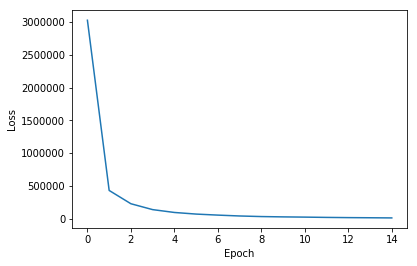

In [9]:
plt.plot(range(epochs), l)
plt.xlabel('Epoch')
plt.ylabel('Loss')